In [13]:
import pickle
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [14]:
with open("log.pkl", "rb") as f:
    logs = pickle.load(f)

In [15]:
pre = []
for p_list in logs["pre"]:
    p_ans = 0
    for i in range(1, 7):
        if p_list[i] > p_list[p_ans]:
            p_ans = i
    pre.append(p_ans)

print(len(pre))  
print(len(logs["ans"]))

2636
2636


In [21]:
correct = 0
for i in range(len(pre)):
    if pre[i] == logs["ans"][i]:
        correct += 1
        
print(correct)
print(correct/len(pre))

2603
0.9874810318664643


In [22]:
C = confusion_matrix(logs["ans"], pre)
C

array([[408,   2,   0,   0,   0,   1,   0],
       [  0, 472,   1,   7,   0,   5,   0],
       [  0,   0, 495,   2,   0,   0,   0],
       [  0,   1,   8, 284,   1,   1,   1],
       [  1,   0,   0,   0, 468,   0,   0],
       [  0,   0,   1,   1,   0, 413,   0],
       [  0,   0,   0,   0,   0,   0,  63]], dtype=int64)

In [23]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[408   2   0   0   0   1   0]
 [  0 472   1   7   0   5   0]
 [  0   0 495   2   0   0   0]
 [  0   1   8 284   1   1   1]
 [  1   0   0   0 468   0   0]
 [  0   0   1   1   0 413   0]
 [  0   0   0   0   0   0  63]]


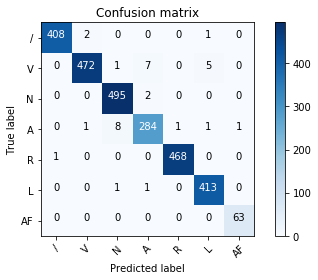

In [24]:
plot_confusion_matrix(cm=C, classes=['/', 'V', 'N', 'A', 'R', 'L', 'AF'])